In [1]:
import os
from glob import glob
import tifffile as tiff
from pprint import pprint
import matplotlib.pyplot as plt
import numpy as np
import cv2
import numpy as np
from skimage import color, morphology, segmentation
import Utils as utils

OPENSLIDE_PATH = r"c:\Users\mlnot\anaconda3\envs\DoctorThesis\Lib\site-packages\openslide\openslide-win64-20231011\openslide-win64-20231011\bin"
import os

if hasattr(os, "add_dll_directory"):
    # Windows
    with os.add_dll_directory(OPENSLIDE_PATH):
        import openslide
else:
    import openslide

from openslide.deepzoom import DeepZoomGenerator

Init 

In [5]:
PATH_TO_IMAGES = glob(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_N_2014_000862_noref\registered_slides/*"
)

# Load VALSI results in OpenSlide
slide_Adam9 = openslide.OpenSlide(PATH_TO_IMAGES[0])
slide_B7H3 = openslide.OpenSlide(PATH_TO_IMAGES[1])
slide_HE = openslide.OpenSlide(PATH_TO_IMAGES[2])
slide_PDPN = openslide.OpenSlide(PATH_TO_IMAGES[3])
slide_PDPN_NZ1 = openslide.OpenSlide(PATH_TO_IMAGES[4])
slide_ROR2 = openslide.OpenSlide(PATH_TO_IMAGES[6])
print(slide_Adam9.level_downsamples)

# Create DeepzoomGenerater for ADAM9
tiles_ADAM9 = DeepZoomGenerator(
    slide_Adam9, tile_size=1024, overlap=0, limit_bounds=True
)
# Print out some Information for ADAM9 tiles
print("number of level in ADAM9 tiles:", tiles_ADAM9.level_count)
print("dimensions of each level:", tiles_ADAM9.level_dimensions)
print("total number of tiles:", tiles_ADAM9.tile_count)

tilesB7H3 = DeepZoomGenerator(slide_B7H3, tile_size=1024, overlap=0, limit_bounds=True)
print("number of level in ADAM9 tiles:", tilesB7H3.level_count)
print("dimensions of each level:", tilesB7H3.level_dimensions)
print("total number of tiles:", tilesB7H3.tile_count)

# Create DeepzoomGenerater for HE
tiles_HE = DeepZoomGenerator(slide_HE, tile_size=1024, overlap=0, limit_bounds=True)
# Print out some Information for HE tiles
print("number of level in HE tiles:", tiles_HE.level_count)
print("dimensions of each level:", tiles_HE.level_dimensions)
print("total number of tiles:", tiles_HE.tile_count)

tiles_PDPN = DeepZoomGenerator(slide_PDPN, tile_size=1024, overlap=0, limit_bounds=True)
print("number of level in HE tiles:", tiles_PDPN.level_count)
print("dimensions of each level:", tiles_PDPN.level_dimensions)
print("total number of tiles:", tiles_PDPN.tile_count)

tiles_PDPN_NZ1 = DeepZoomGenerator(
    slide_PDPN_NZ1, tile_size=1024, overlap=0, limit_bounds=True
)
print("number of level in HE tiles:", tiles_PDPN_NZ1.level_count)
print("dimensions of each level:", tiles_PDPN_NZ1.level_dimensions)
print("total number of tiles:", tiles_PDPN_NZ1.tile_count)

tiles_ROR2 = DeepZoomGenerator(slide_ROR2, tile_size=1024, overlap=0, limit_bounds=True)
print("number of level in HE tiles:", tiles_ROR2.level_count)
print("dimensions of each level:", tiles_ROR2.level_dimensions)
print("total number of tiles:", tiles_ROR2.tile_count)

(1.0,)
number of level in ADAM9 tiles: 19
dimensions of each level: ((1, 1), (1, 2), (2, 3), (3, 5), (5, 10), (9, 19), (17, 37), (33, 73), (66, 146), (132, 291), (264, 581), (528, 1162), (1055, 2323), (2109, 4646), (4217, 9291), (8434, 18581), (16867, 37162), (33734, 74324), (67467, 148648))
total number of tiles: 12929
number of level in ADAM9 tiles: 19
dimensions of each level: ((1, 1), (1, 2), (2, 3), (3, 5), (5, 10), (9, 19), (17, 37), (33, 73), (66, 146), (132, 291), (264, 581), (528, 1162), (1055, 2323), (2109, 4646), (4217, 9291), (8434, 18581), (16867, 37162), (33734, 74324), (67467, 148648))
total number of tiles: 12929
number of level in HE tiles: 19
dimensions of each level: ((1, 1), (1, 2), (2, 3), (3, 5), (5, 10), (9, 19), (17, 37), (33, 73), (66, 146), (132, 291), (264, 581), (528, 1162), (1055, 2323), (2109, 4646), (4217, 9291), (8434, 18581), (16867, 37162), (33734, 74324), (67467, 148648))
total number of tiles: 12929
number of level in HE tiles: 19
dimensions of each 

In [7]:
TARGETDIR = r"C:\Users\mlnot\Desktop\Images\saved _tiles\N_2014_000862\PDPN_NZ1_1024"
utils.separate_stains_and_save__tiles_as_tif(
    tiles_PDPN_NZ1, tiles_PDPN_NZ1.level_count, TARGETDIR
)

  0%|          | 0/140 [00:00<?, ?it/s]

100%|██████████| 140/140 [20:54<00:00,  8.96s/it]


Deep Zoom and Tile Generation

In [ ]:
# tile_dims_large = tiles_ADAM9.get_tile_dimensions(18,(276,559))
# print(tile_dims_large)

# Print number of tiles for each level in ADAM9 tiles
for i in range(tiles_ADAM9.level_count):
    print("ADAM9 at level ", i, " number tiles: ", tiles_ADAM9.level_tiles[i])

# Print number of tiles for each level in HE tiles
for i in range(tiles_HE.level_count):
    print("HE at level ", i, " number tiles: ", tiles_HE.level_tiles[i])

In [ ]:
# Get single tile from lvl 15 pos x = 19, y = 34 from ADAM9 tiles and convert to rgb
single_tile_ADAM9 = tiles_ADAM9.get_tile(
    13, (0, 0)
)  # for lvl 15 (19,33), lvl 18, (156, 266)
single_tile_ADAM9_RGB = single_tile_ADAM9.convert("RGB")

# Get single tile from lvl 15 pos x = 19, y = 34 from HE tiles and convert to rgb
single_tile_HE = tiles_HE.get_tile(17, (79, 133))
single_tile_HE_RGB = single_tile_HE.convert("RGB")

# Show both tiles: result: not perfect matchup tumorwise
single_tile_ADAM9_RGB.show()
# single_tile_HE_RGB.show()

In [ ]:
slide_Adam9.read_region((0, 0), 13, (1024, 1024))

In [ ]:
## Trying IHC Color separation from bnsreenu Ep. 278
# separate IHC staining from hematoxylin counterstaining
from skimage import data, img_as_ubyte, io
from skimage.color import rgb2hed, hed2rgb


# Separate individual stains from IHC image
def color_separation(ihc_rgb):
    # convert RGB image to HED using prebuild skimage method
    ihc_hed = rgb2hed(ihc_rgb)

    # Create RGB image for each seperate stain
    # Convert to ubyte for easier saving to drive as image
    null = np.zeros_like(ihc_hed[:, :, 0])
    ihc_h = img_as_ubyte(hed2rgb(np.stack((ihc_hed[:, :, 0], null, null), axis=-1)))
    ihc_e = img_as_ubyte(hed2rgb(np.stack((null, ihc_hed[:, :, 1], null), axis=-1)))
    ihc_d = img_as_ubyte(hed2rgb(np.stack((null, null, ihc_hed[:, :, 2]), axis=-1)))

    return (ihc_h, ihc_e, ihc_d)


# (
#    H,
#    E,
#    D,
# ) = color_separation(single_tile_ADAM9_RGB)


# (H1, E1, D1) = color_separation(single_tile_HE_RGB)

# plt.imsave(r"C:\Users\mlnot\Desktop\Images\HE_DAB_img.png",D)

# fig, axes = plt.subplots(2, 2, figsize=(15, 10), sharex=True, sharey=True)
# ax = axes.ravel()
# ax[0].imshow(single_tile_ADAM9_RGB)
# ax[0].set_title("ADAM9 original")

# ax[1].imshow(H)
# ax[1].set_title("Hematoxylin")

# ax[2].imshow(E)
# ax[2].set_title("Eosin")

# ax[3].imshow(D)
# ax[3].set_title("DAB")

# ax[4].imshow(single_tile_HE_RGB)
# ax[4].set_title("HE original")

# ax[5].imshow(H1)
# ax[5].set_title("HE - Hematoxylin")

# ax[6].imshow(E1)
# ax[6].set_title("HE - Eosin")

# ax[7].imshow(D1)
# ax[7].set_title("HE - DAB")

Saving tiles in seperate folders for working on them later
- original tiles 
- dab tiles
- H tiles 

In [ ]:
cols, rows = tiles_ADAM9.level_tiles[18]

ORIGINAL_TILE_DIR = (
    r"C:\Users\mlnot\Desktop\Images\saved _tiles\N_2014_000862\ADAM9\original_tiles/"
)

DAB_TILE_DIR = (
    r"C:\Users\mlnot\Desktop\Images\saved _tiles\N_2014_000862\ADAM9\DAB_tiles/"
)

H_TILE_DIR = r"C:\Users\mlnot\Desktop\Images\saved _tiles\N_2014_000862\ADAM9\H_tiles/"


for row in range(rows):
    for col in range(cols):
        tile_name = str(col) + "_" + str(row)
        # tile_name = os.path.join(ORIGINAL_TILE_DIR, "%d_%d" % (col, row))
        # print("Now saving tile: ", tile_name)
        temp = tiles_ADAM9.get_tile(18, (col, row))
        # temp_RGB = temp.convert("RGB")
        temp_np = np.array(temp)

        # Save original as .tiff
        tiff.imsave(ORIGINAL_TILE_DIR + tile_name + "_original.tif", temp_np)

        # Now only process tiles that are mostly covered and not blank to save runtime and space
        if temp_np.mean() < 230 and temp_np.std() > 15:
            print("Separating color for tile: ", tile_name)
            H, E, DAB = color_separation(temp_np)

            # saving H and Dab in dir, not saving E because usually little staining in IHC
            tiff.imsave(DAB_TILE_DIR + tile_name + "_DAB.tif", DAB)
            tiff.imsave(H_TILE_DIR + tile_name + "_H.tif", H)
        else:
            print("NOT PROCESSING TILE", tile_name)

In [ ]:
# saving HE slide tiles

ORIGINAL_TILE_DIR_HE = (
    r"C:\Users\mlnot\Desktop\Images\saved _tiles\N_2014_000862\HE\original_tiles/"
)
cols, rows = tiles_HE.level_tiles[18]
for row in range(rows):
    for col in range(cols):
        tile_name = str(col) + "_" + str(row)
        # tile_name = os.path.join(ORIGINAL_TILE_DIR, "%d_%d" % (col, row))
        # print("Now saving tile: ", tile_name)
        temp = tiles_HE.get_tile(18, (col, row))
        temp_RGB = temp.convert("RGB")
        temp_np = np.array(temp_RGB)
        tiff.imsave(ORIGINAL_TILE_DIR_HE + tile_name + "_original.tif", temp_np)
        print("Saving tile: ", tile_name)

Show regions in ADAM9 nad HE slide

In [ ]:
### Determine region, level and size
region = (50000, 40000)
level = 0
size = (16384, 16384)  # 16384
### Show region of ADAM9
ADAM9_region = slide_Adam9.read_region(region, 0, size)
ADAM9_region_RGB = ADAM9_region.convert("RGB")
ADAM9_region_np = np.array(ADAM9_region_RGB)
tiff.imsave(r"C:\Users\mlnot\Desktop\Images/" + "ADAM9_region.tif", ADAM9_region_np)
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.imshow(ADAM9_region_np)

In [ ]:
###Show region of HE slide
HE_region = slide_HE.read_region(region, level, size)
HE_region_RGB = HE_region.convert("RGB")
HE_region_np = np.array(HE_region_RGB)
tiff.imsave(r"C:\Users\mlnot\Desktop\Images/" + "HE.tif", HE_region_np)
plt.figure(figsize=(20, 10))
plt.axis("off")
plt.imshow(HE_region_np)

Doing some tests with image masking 

In [ ]:
img1 = cv2.imread(r"C:\Users\mlnot\Desktop\Images\test.png")
img2 = cv2.imread(r"C:\Users\mlnot\Desktop\Images\test1.png")


lum = color.rgb2gray(img1)
mask = morphology.remove_small_holes(
    morphology.remove_small_objects(lum < 0.7, 500), 500
)

mask = morphology.opening(mask, morphology.disk(3))
slic = segmentation.slic(img1, n_segments=200, start_label=1)
m_slic = segmentation.slic(img1, n_segments=100, mask=mask, start_label=1)

fig, ax_arr = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10, 10))
ax1, ax2, ax3, ax4 = ax_arr.ravel()

ax1.imshow(img1)
ax1.set_title("Original Image")

ax2.imshow(mask, cmap="gray")
ax2.set_title("Mask")

ax3.imshow(segmentation.mark_boundaries(img1, slic))
ax3.contour(mask, colors="red", linewidths=1)
ax3.set_title("SLIC")

ax4.imshow(segmentation.mark_boundaries(img2, m_slic))
ax4.contour(mask, colors="red", linewidths=1)
ax4.set_title("maskSLIC")

for ax in ax_arr.ravel():
    ax.set_axis_off()

plt.tight_layout()
plt.show

In [ ]:
# hist = cv2.calcHist([img1],[1],None,256,[0,256])
# masked_img= cv2.bitwise_and(img1,img1,mask=mask)
# plt.imshow(masked_img)

color = ("b", "g", "r")
for i, col in enumerate(color):
    histr = cv2.calcHist([img1], [i], None, [256], [0, 256])
    plt.plot(histr, color=col)
    plt.xlim([0, 256])
plt.show()

In [ ]:
PATH_TO_IMAGES = glob(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_example\registered_slides/*"
)
tupleIHC = openslide.OpenSlide(PATH_TO_IMAGES[0])
tupleHE = openslide.OpenSlide(PATH_TO_IMAGES[1])

In [ ]:
# Downsampling
from PIL import Image
import math


def scaletoPIL(slide, SCALEFACTOR):
    large_w, large_h = slide.dimensions
    new_w = math.floor(large_w / SCALEFACTOR)
    new_h = math.floor(large_h / SCALEFACTOR)
    level = slide.get_best_level_for_downsample(SCALEFACTOR)
    wsi = slide.read_region((0, 0), level, slide.level_dimensions[level])
    wsi = wsi.convert("RGB")
    img = wsi.resize((new_w, new_h), Image.BILINEAR)

    return img, large_w, large_h, new_w, new_h


# thumb = slide_Adam9.get_thumbnail((256,256))
# a = np.array(thumb)
# im = Image.fromarray(a,mode="RGB")

In [ ]:
ds_tupleAdam, large_w, large_h, new_w, new_h = utils.downsample_Openslide_to_PIL(
    tupleIHC, SCALEFACTOR=64
)
ds_tupleAdam.save(r"C:\Users\mlnot\Desktop\Images\downsaples\HE_reference/ds_ADAM9.png")

In [ ]:
ds_HE, large_w, large_h, new_w, new_h = scaletoPIL(tupleHE, SCALEFACTOR=64)
ds_HE.save(r"C:\Users\mlnot\Desktop\Images\downsaples\HE_reference/ds_B7H3.png")

In [ ]:
slide_B7H3 = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_tuples\N_2014_000862_B7H3\registered_slides\N_2014_000862_B7H3.ome.tiff"
)
tiles_B7H3 = DeepZoomGenerator(slide_B7H3, tile_size=1024, overlap=0, limit_bounds=True)

In [ ]:
slide_PDPN = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_tuples\N_2014_000862_PDPN\registered_slides\N_2014_000862_PDPN.ome.tiff"
)
tiles_PDPN = DeepZoomGenerator(slide_PDPN, tile_size=1024, overlap=0, limit_bounds=True)

In [ ]:
slide_PDPN_NZ1 = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_tuples\N_2014_000862_PDPN_NZ1\registered_slides\N_2014_000862_PDPN_NZ1.ome.tiff"
)
tiles_PDPN_NZ1 = DeepZoomGenerator(
    slide_PDPN_NZ1, tile_size=1024, overlap=0, limit_bounds=True
)

In [ ]:
slide_ROR2 = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_tuples\N_2014_000862_ROR2\registered_slides\N_2014_000862_ROR2.ome.tiff"
)
tiles_ROR2 = DeepZoomGenerator(slide_ROR2, 1024, overlap=0, limit_bounds=True)

In [ ]:
slide_Adam9 = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_tuples\N_2014_000862_ADAM9\registered_slides\N_2014_000862_ADAM9.ome.tiff"
)
tiles_ADAM9_1024 = DeepZoomGenerator(slide_Adam9, 1024, overlap=0, limit_bounds=True)

In [ ]:
print(tiles_ADAM9_1024.level_count)
print(tiles_ADAM9_1024.level_dimensions)
print(tiles_ADAM9_1024.tile_count)

In [ ]:
print(tiles_ROR2.level_count)
print(tiles_ROR2.level_dimensions)
print(tiles_ROR2.tile_count)

In [ ]:
TARGETDIR = r"C:\Users\mlnot\Desktop\Images\saved _tiles\N_2014_000862\PDPN_NZ1_1024"
utils.separate_stains_and_save__tiles_as_tif(
    tiles_PDPN_NZ1, tiles_PDPN_NZ1.level_count, TARGETDIR
)

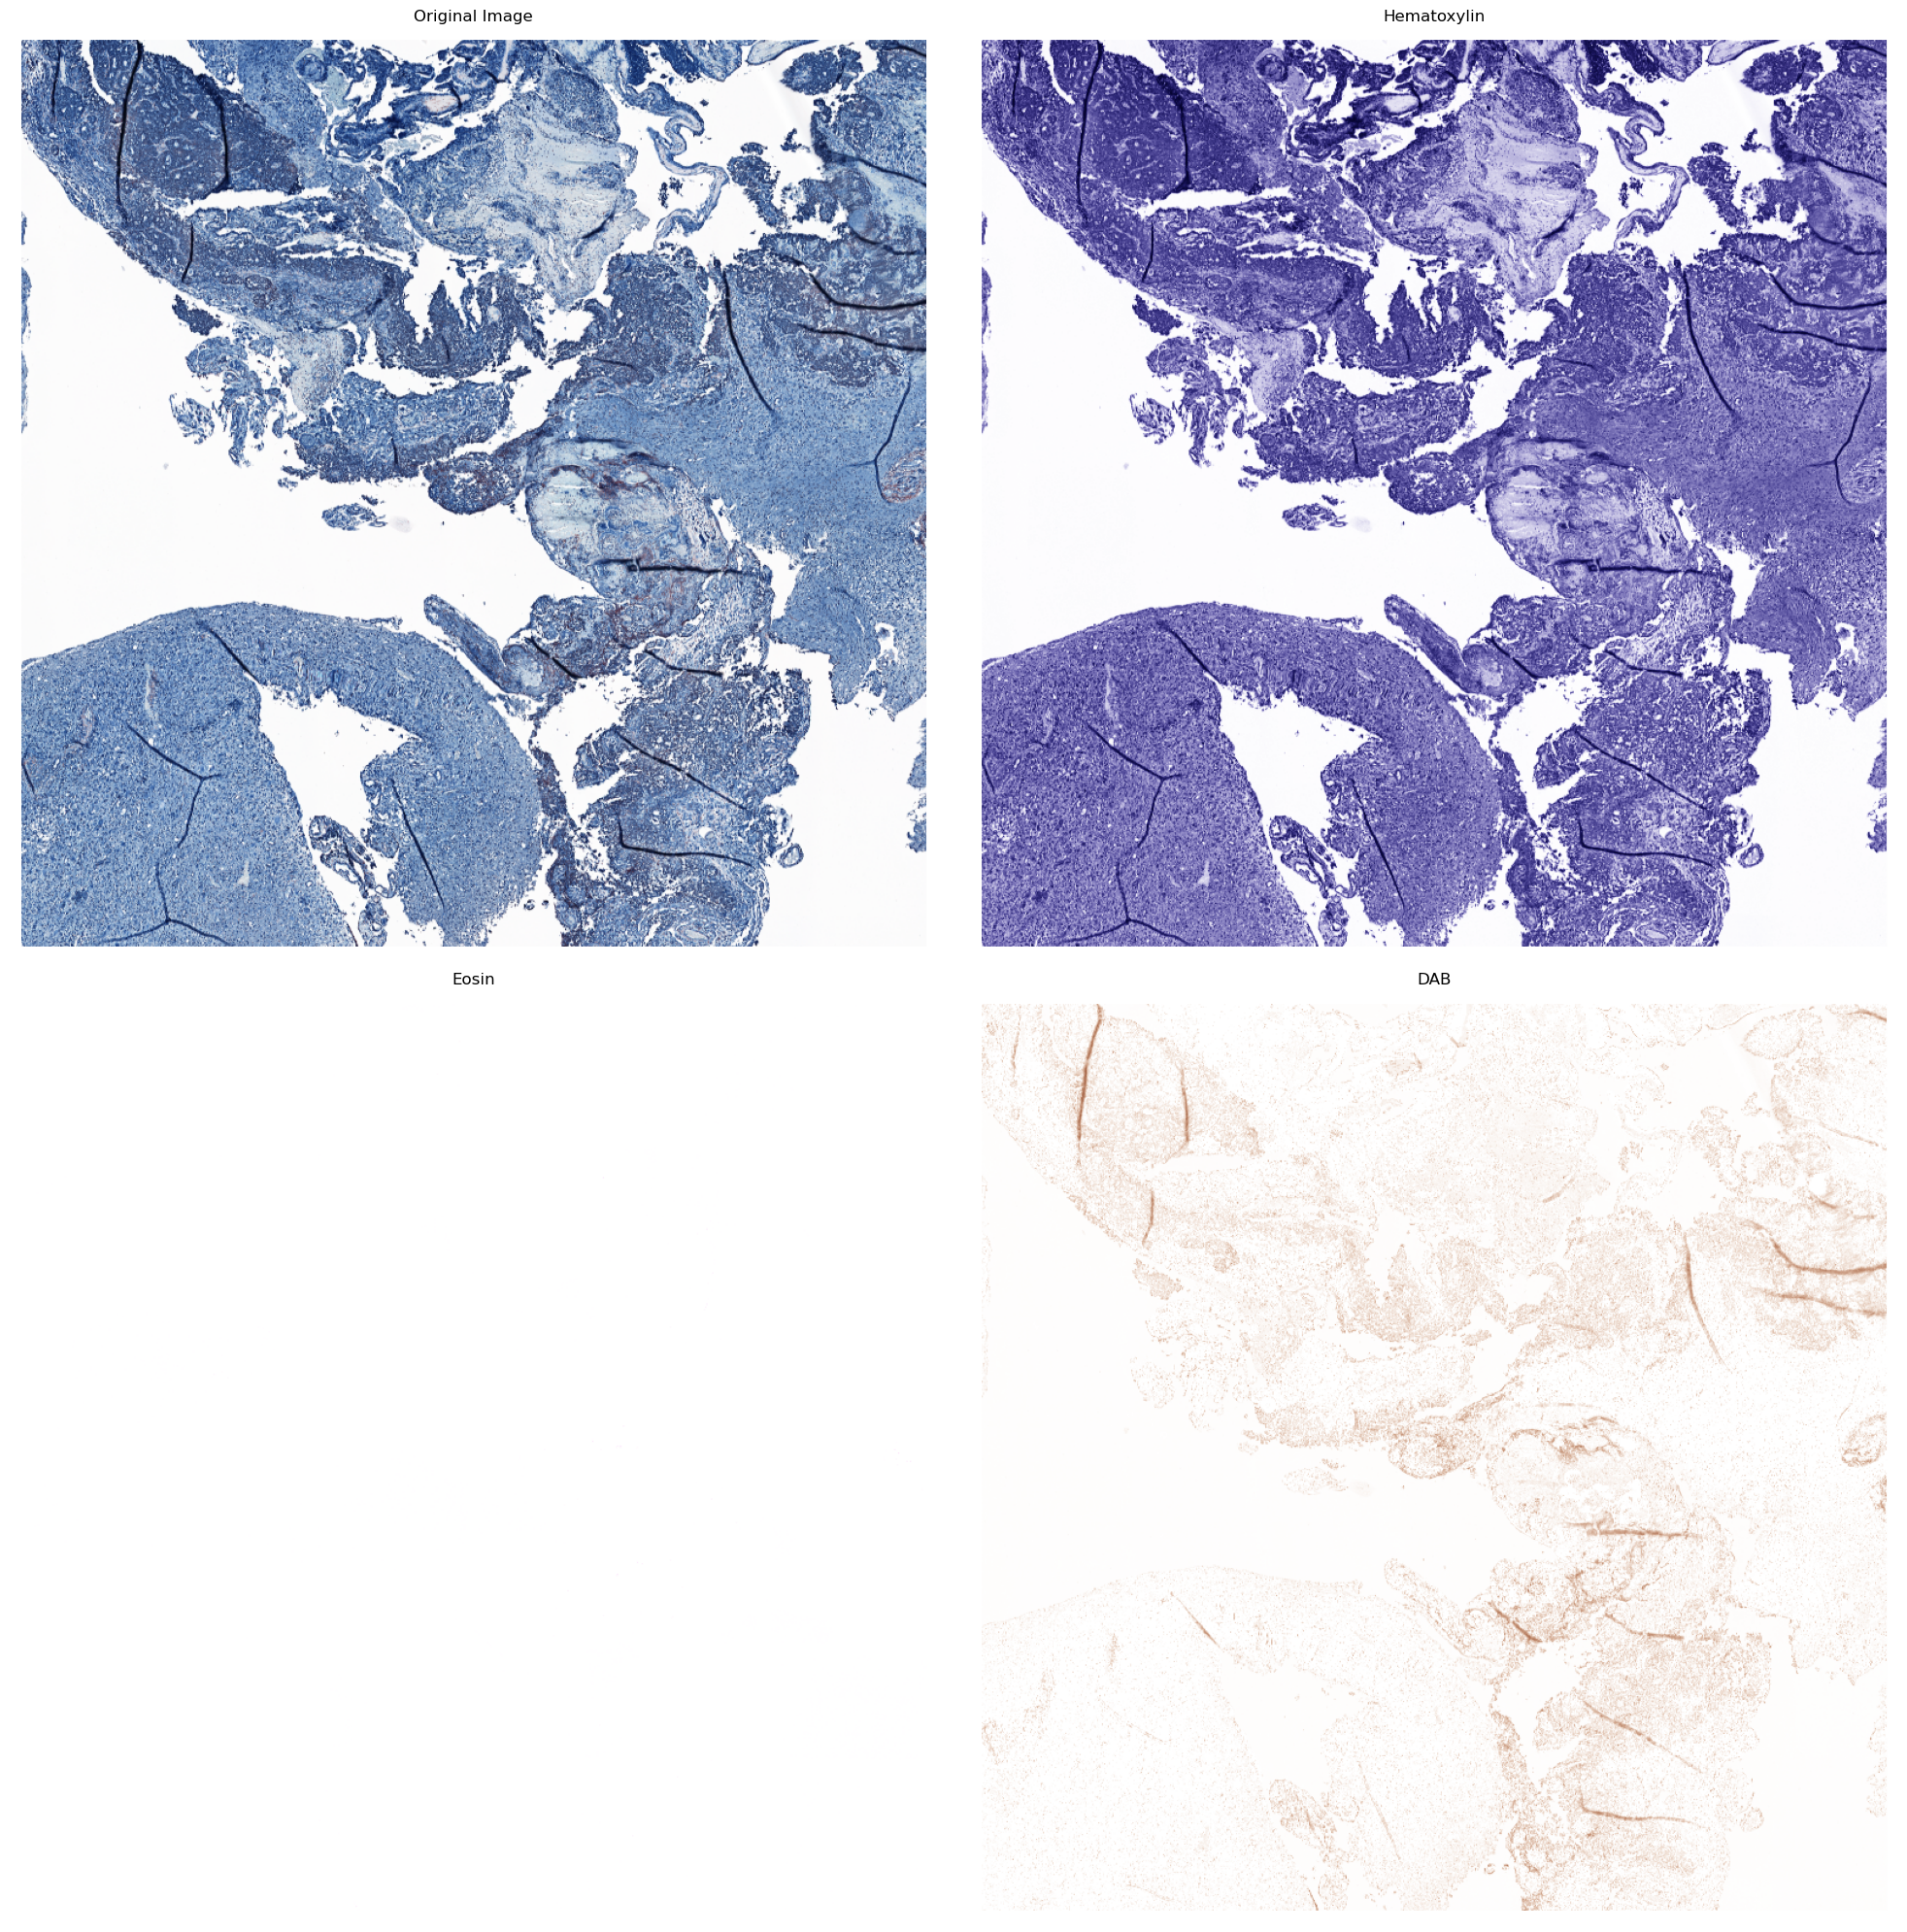

In [7]:
##For presentation
image = cv2.imread(r"C:\Users\mlnot\Desktop\Images\test1.png")
utils, e, d = utils.ihc_stain_separation(image)

fig, ax = plt.subplots(2, 2, figsize=(20, 20))
ax[0][0].imshow(image)
ax[0][0].set_title("Original Image")
ax[0][0].axis("off")

ax[0][1].imshow(utils)
ax[0][1].set_title("Hematoxylin")
ax[0][1].axis("off")

ax[1][0].imshow(e)
ax[1][0].set_title("Eosin")
ax[1][0].axis("off")

ax[1][1].imshow(d)
ax[1][1].set_title("DAB")
ax[1][1].axis("off")
plt.tight_layout()
plt.show()

In [4]:
HE = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\N_2014_000862_MRXS\N_2014_000862_HE.mrxs"
)
gd2 = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\N_2014_000862_MRXS\N_2014_000862_GD2.mrxs"
)
pdpn = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\N_2014_000862_MRXS\N_2014_000862_PDPN.mrxs"
)

In [7]:
hethumb = HE.get_thumbnail((528, 1162))
hethumb.show()
hethumb.save(r"C:\Users\mlnot\Desktop\SAIL\Thumbnails/HE.png")

In [8]:
gd2thumb = gd2.get_thumbnail((528, 1162))
gd2thumb.show()
gd2thumb.save(r"C:\Users\mlnot\Desktop\SAIL\Thumbnails/target_1.png")

In [9]:
pdpnthumb = pdpn.get_thumbnail((528, 1162))
pdpnthumb.show()
pdpnthumb.save(r"C:\Users\mlnot\Desktop\SAIL\Thumbnails/target_2.png")

In [5]:
He = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_N_2014_000862_noref\registered_slides\N_2014_000862_HE.ome.tiff"
)
target1 = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_N_2014_000862_noref\registered_slides\N_2014_000862_GD2.ome.tiff"
)
target2 = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_N_2014_000862_noref\registered_slides\N_2014_000862_PDPN.ome.tiff"
)

In [8]:
mask = openslide.OpenSlide(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_N_2014_000862_noref\registered_slides\N_2014_000862_HE.ome_segmented.tiff"
)

In [9]:
mask = mask.get_thumbnail((264, 581))
mask.show()
mask.save(r"C:\Users\mlnot\Desktop\SAIL\Thumbnails\after registration/mask.png")

In [4]:
he, old_w, old_h, new_w, new_h = utils.downsample_Openslide_to_PIL(He, SCALEFACTOR=127)
he.save(r"C:\Users\mlnot\Desktop\SAIL\Thumbnails\after registration/he_ds.png")

In [10]:
target1.show()
target1.save(
    r"C:\Users\mlnot\Desktop\SAIL\Thumbnails\after registration/target1_ds.png"
)

In [2]:
dabslist = []
for glob in glob(
    r"C:\Users\mlnot\Desktop\Images\saved _tiles\N_2014_000862\GD2_1024\DAB_tiles\*.tif"
):
    dabslist.append(glob)

AttributeError: 'OpenSlide' object has no attribute 'level_tiles'

In [4]:
utils.reconstruct_slide(
    r"C:\Users\mlnot\Desktop\Slides\VALIS Out\slide_registration_N_2014_000862_noref\registered_slides\N_2014_000862_PDPN.ome.tiff",
    r"C:\Users\mlnot\Desktop\SAIL/",
)

  0%|          | 0/146 [00:00<?, ?it/s]


AttributeError: 'Image' object has no attribute 'shape'